# Evolutionary Algorithms Lab - Set Covering Problem

General Problem start.

In [309]:
import logging
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib import cm
import random

logging.basicConfig(
    format="[%(asctime)s] %(levelname)s: %(message)s",
    datefmt="%H:%M:%S",
    level=logging.INFO,
)

N_VALUES = [5, 10, 20, 100, 500, 1000]
SEED = 42

def problem(N, seed=SEED):
    random.seed(seed)
    return [
        list(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))
    ]

Functions to use in all the algorithms.

In [310]:
def goal_test(N, solution):
    solution = [x for l in solution for x in l]
    sol = tuple(solution)
    set_sol = set(elem for elem in solution)
    goal = set(range(N))
    return set_sol == goal

def fitness_eval(solution):
        w = sum(len(_) for _ in solution)
        return w

def tweak_sol(solution, all_lists, sigma, N):
    new_solution = set(solution)
    normal = random.randint(0, sigma)

    if random.random() < 0.1:
        new_solution = set()
        while not goal_test(N, new_solution):
            new_solution.add(random.choice(list(all_lists - new_solution)))
            
    for mutations in range(normal):
        if random.random() > 0.5:
            new_solution.remove(random.choice(list(new_solution)))
            new_solution.add(random.choice(list(all_lists - new_solution)))

    return new_solution

1+1 EA algorithm

In [311]:
def plus1_ea(solution, all_lists, steps, sigma, n):
    
    history = []
    for steps in range(steps):
        max_tweak = 2000
        tweaks = 0
        candidate = tweak_sol(solution, all_lists, sigma, n)
        while not goal_test(n, candidate) and max_tweak > tweaks:
            candidate = tweak_sol(solution, all_lists, sigma, n)
            tweaks += 1
        
        if fitness_eval(candidate) < fitness_eval(solution):
            
            solution = candidate

        history.append(fitness_eval(solution))

    return solution, history


[23:58:56] INFO: N = 5, best solution: w=5 (bloat=0%)
[23:58:57] INFO: N = 10, best solution: w=10 (bloat=0%)
[23:58:58] INFO: N = 20, best solution: w=24 (bloat=20%)
[23:59:02] INFO: N = 100, best solution: w=208 (bloat=108%)
[23:59:24] INFO: N = 500, best solution: w=1605 (bloat=221%)
[00:00:44] INFO: N = 1000, best solution: w=3822 (bloat=282%)


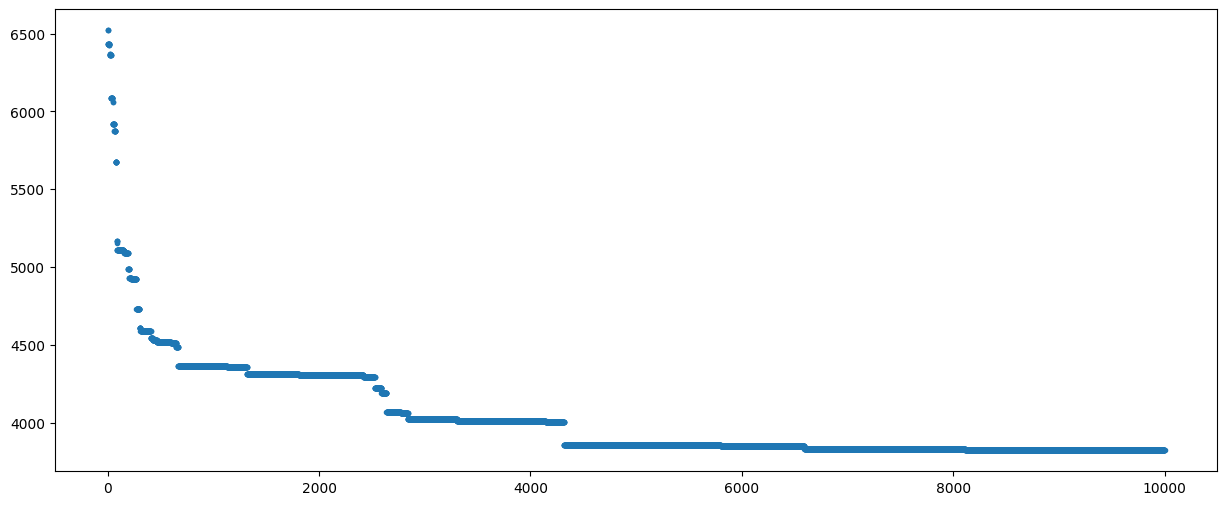

In [318]:
SIGMA = 1
STEPS = 10000

for num in N_VALUES:
    all_lists = set(tuple(element) for element in problem(num, SEED))
    
    random_list = random.choice(list(all_lists))
    
    start_element = set()
    while not goal_test(num, start_element):
      start_element.add(random.choice(list(all_lists - start_element)))
      
  
    sol, history = plus1_ea(start_element, all_lists, STEPS, SIGMA, num)
    
    if num == 1000:
      plt.figure(figsize=(15, 6))
      plt.scatter(range(STEPS), history, marker=".")
    
    logging.info(f"N = {num}, best solution: w={sum(len(_) for _ in sol)} (bloat={(sum(len(_) for _ in sol)-num)/num*100:.0f}%)")
    
           

 1 + λ Evolution algorithm.

In [316]:
# 1 + λ ES

def plusLambda_ea(solution, all_lists, steps, offspring_size, sigma, n):
    
    history = []
    for steps in range(steps):
        
        offspring = offspring_gen(solution, all_lists, offspring_size, sigma, n)
        evals = []
        for offs in offspring:
            evals.append(fitness_eval(offs))
        solution = offspring[np.argmin(evals)]
        history.append(fitness_eval(solution))

    return solution, history



def offspring_gen(parent, all_lists, offspring_size, sigma, N):
    offspring = [parent]
    for l in range(offspring_size):
        max_tweak = 2000
        tweaks = 0
        new_offspring = tweak_sol(parent, all_lists, sigma, N)
        
        while not goal_test(N, new_offspring) and max_tweak > tweaks:
            new_offspring = tweak_sol(parent, all_lists, sigma, N)
            tweaks += 1
        offspring.append(new_offspring)
    return tuple(offspring)


[23:51:33] INFO: N = 5, best solution: w=5 (bloat=0%)
[23:51:35] INFO: N = 10, best solution: w=10 (bloat=0%)
[23:51:37] INFO: N = 20, best solution: w=24 (bloat=20%)
[23:51:50] INFO: N = 100, best solution: w=208 (bloat=108%)
[23:53:45] INFO: N = 500, best solution: w=1504 (bloat=201%)
[23:58:46] INFO: N = 1000, best solution: w=3534 (bloat=253%)


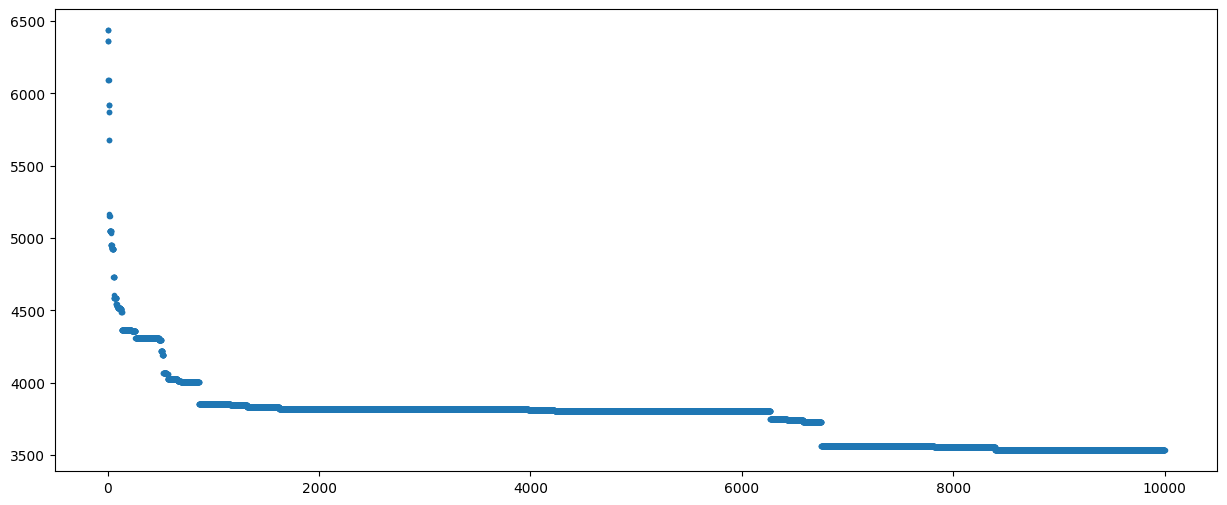

In [317]:
SIGMA = 1
STEPS = 10000
OFFSPRING_SIZE = 5

for num in N_VALUES:
    all_lists = set(tuple(element) for element in problem(num, SEED))
    
    random_list = random.choice(list(all_lists))
    
    start_element = set()
    while not goal_test(num, start_element):
      start_element.add(random.choice(list(all_lists - start_element)))
      
    
    #test = offspring_gen(start_element, all_lists, OFFSPRING_SIZE, SIGMA, num)
    #logging.info(f"test {test}")
    sol, history = plusLambda_ea(start_element, all_lists, STEPS, OFFSPRING_SIZE, SIGMA, num)
    
    if num == 1000:
      plt.figure(figsize=(15, 6))
      plt.scatter(range(STEPS), history, marker=".")
    
    logging.info(f"N = {num}, best solution: w={sum(len(_) for _ in sol)} (bloat={(sum(len(_) for _ in sol)-num)/num*100:.0f}%)")